<a href="https://colab.research.google.com/github/MatthewFried/Udemy/blob/master/Day1_Example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day_1_Example2
___

### Introduction
This notebook deals with the task of constructing a cross validated linear regression model that predicts the energy production of a power plant.  
The data used for this task can be obtained from the UC Irvine machine learning archive [HERE](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant).  
The data set is comprised of nearly 10,000 observations of 1 response/dependent variable (Net hourly electrical
energy output) and 4 explanatory/independent variables (Temperature, Ambient pressure, Relative humidity,
and Exhaust vacuum).  
The observations were collected from a Combined Cycle Power Plant (CCPP) over 6 years (2006-2011).  
A CCPP is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

This notebook consists of three main sections:
- Exploratory Data Analysis 
    - Distribution analysis of all the variables
    - Linearity analysis of the independent variables with the dependent variable
- Regression Model Construction & Evaluation
    - Creation of two models based on the findings in the EDA section
    - Model cross validation and evaluation
- Conclusions

### Section I: Exploratory Data Analysis

In [ ]:
# load pandas and numpy libraries
import pandas as pd 
import numpy as np

# load the entire dataset from a file uploaded to my GitHub repo
plant_df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day1/Day1_Data.csv")

# check the dataset uploaded as expected
print("The number of observations in the dataset: {}".format(plant_df.shape))
plant_df.head()

The number of observations in the dataset: (9568, 5)


,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
# rename the variables in the dataset with meaningfull names 
plant_df = plant_df.rename(columns={'T':'Temperature',
                                    'V':'Exhaust_vacuum',
                                    'AP':'Ambient_pressure',
                                    'RH':'Relative_humidity',
                                    'EP':'Net_hourly_electrical_energy_output'})

In [ ]:
# check for null values in the dataset
plant_df.isnull().sum()

Temperature                            0
Exhaust_vacuum                         0
Ambient_pressure                       0
Relative_humidity                      0
Net_hourly_electrical_energy_output    0
dtype: int64

In [ ]:
# show dataset summary statistics
plant_df.describe()

,Temperature,Exhaust_vacuum,Ambient_pressure,Relative_humidity,Net_hourly_electrical_energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


The dataset has no null values or missing values for any of the variables.  
The variables are all numerical variables. 

In [ ]:
# load plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


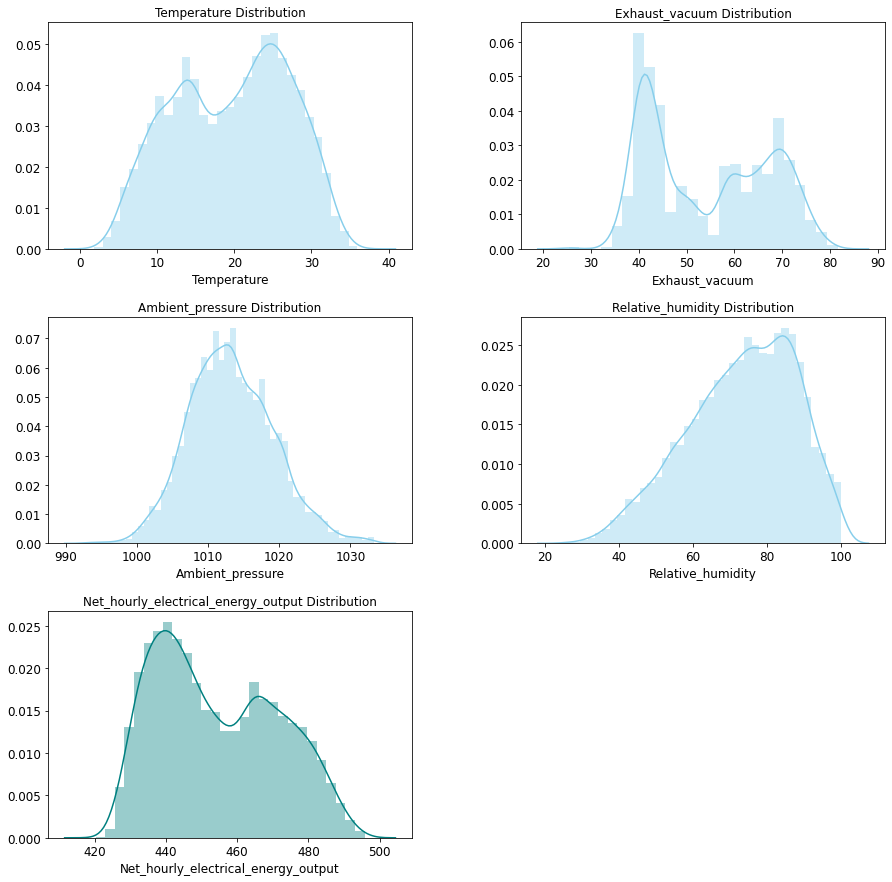

In [ ]:
# plot histograms of all the variables, which are all numerical, to view their distribution

plt.rcParams.update({'font.size': 12,'figure.figsize':(15,15)}) # set plot parameters
f1, axes = plt.subplots(3, 2)
sns.distplot(plant_df["Temperature"], color="skyblue", ax=axes[0, 0])
axes[0,0].set_title("Temperature Distribution",fontsize=12)
sns.distplot(plant_df["Exhaust_vacuum"], color="skyblue", ax=axes[0, 1])
axes[0,1].set_title("Exhaust_vacuum Distribution",fontsize=12)
sns.distplot(plant_df["Ambient_pressure"], color="skyblue", ax=axes[1, 0])
axes[1,0].set_title("Ambient_pressure Distribution",fontsize=12)
sns.distplot(plant_df["Relative_humidity"], color="skyblue", ax=axes[1, 1])
axes[1,1].set_title("Relative_humidity Distribution",fontsize=12)
sns.distplot(plant_df["Net_hourly_electrical_energy_output"], color="teal", ax=axes[2, 0])
axes[2,0].set_title("Net_hourly_electrical_energy_output Distribution",fontsize=12)
axes[2,1].set_axis_off() # discard the extra subplot
plt.subplots_adjust(hspace=0.3, wspace=0.3) # set layout

plt.show() # show plots

The distribution of the independent variables from the histograms above:  
- 'Temperature' has a Bimodal distribution
- 'Exhaust_vacuum' has a Bimodal distribution
- 'Ambient_pressure' has a roughly Normal distribution
- 'Relative_humidity' has a Left Skewd distribution  

The distribution of the dependent variable from the histogram above:
- 'Net_hourly_electrical_energy_output' has a Bimodal distribution

Since the dependent variable 'Net_hourly_electrical_energy_output' has a Bimodal distribution, it is likely that the independent variables 'Temperature' and 'Exhaust_vacuum' who also have a Bimodal distribution will be better predictors than the other two independent variables. 

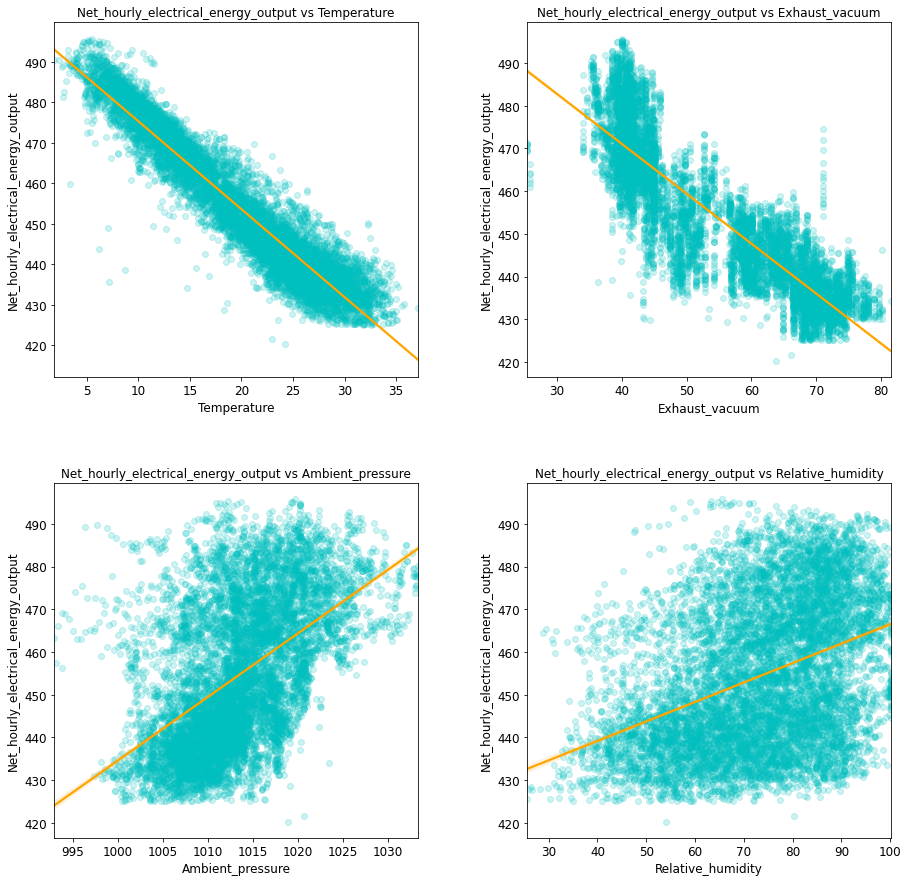

In [ ]:
# plot csatterplots of all the independent variables, with the dependant variable

plt.rcParams.update({'font.size': 12,'figure.figsize':(15,15)}) # set plot parameters
f2, axes = plt.subplots(2, 2)
sns.regplot(plant_df.Temperature,plant_df.Net_hourly_electrical_energy_output,data=plant_df,color="c",scatter_kws={'alpha': 0.2},line_kws={'color': 'orange'},ax=axes[0, 0])
axes[0,0].set_title("Net_hourly_electrical_energy_output vs Temperature",fontsize=12)
sns.regplot(plant_df.Exhaust_vacuum,plant_df.Net_hourly_electrical_energy_output,data=plant_df,color="c",scatter_kws={'alpha': 0.2},line_kws={'color': 'orange'},ax=axes[0, 1])
axes[0,1].set_title("Net_hourly_electrical_energy_output vs Exhaust_vacuum",fontsize=12)
sns.regplot(plant_df.Ambient_pressure,plant_df.Net_hourly_electrical_energy_output,data=plant_df,color="c",scatter_kws={'alpha': 0.2},line_kws={'color': 'orange'},ax=axes[1, 0])
axes[1,0].set_title("Net_hourly_electrical_energy_output vs Ambient_pressure",fontsize=12)
sns.regplot(plant_df.Relative_humidity,plant_df.Net_hourly_electrical_energy_output,data=plant_df,color="c",scatter_kws={'alpha': 0.2},line_kws={'color': 'orange'},ax=axes[1, 1])
axes[1,1].set_title("Net_hourly_electrical_energy_output vs Relative_humidity",fontsize=12)

plt.subplots_adjust(hspace=0.3, wspace=0.3) # set layout
plt.show() # show plots

The Scatterplots above show the following:
- 'Temperature' has a strong negative linear relationship with 'Net_hourly_electrical_energy_output'
- 'Exhaust_vacuum' has a strong negative linear relationship with 'Net_hourly_electrical_energy_output'
- 'Ambient_pressure' has a weak positive linear relationship with 'Net_hourly_electrical_energy_output'
- 'Relative_humidity' does not have a linear relationship with 'Net_hourly_electrical_energy_output'

In [ ]:
# view correlation matrix for the variables in the dataset
corrMatrix = plant_df.corr()
corrMatrix

,Temperature,Exhaust_vacuum,Ambient_pressure,Relative_humidity,Net_hourly_electrical_energy_output
Temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
Exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
Ambient_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
Relative_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
Net_hourly_electrical_energy_output,-0.948128,-0.869780,0.518429,0.389794,1.000000


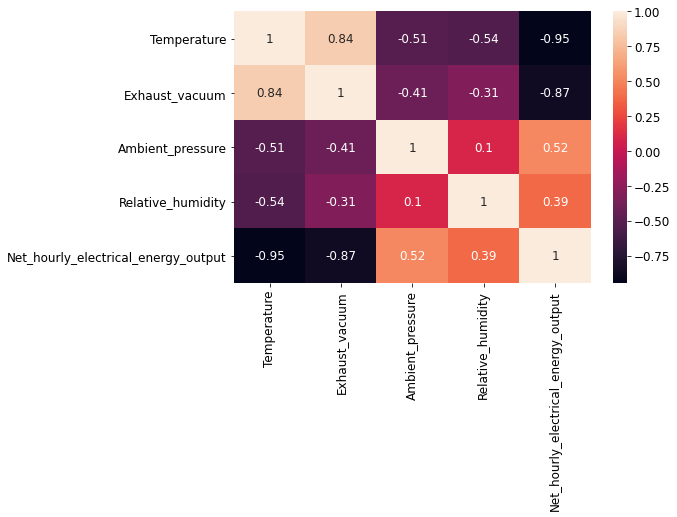

In [ ]:
# show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 12,'figure.figsize':(8,5)}) # set plot parameters
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() # show plot

The correlation heatmap above shows:  
- The dependent variable 'Net_hourly_electrical_energy_output' has the highest correlation with independent variables 'Temperature' & 'Exhaust_vacuum'
- Independent variables 'Temperature' & 'Exhaust_vacuum' are collinear (highly correlated), and adding more than one of these variables to the model would not add much value to the model
- Independent variable 'Relative_humidity' has a low correlation with the dependent variable 'Net_hourly_electrical_energy_output', and since it does not have a linear relationship with the dependent variable it should not be added to the models

### Section II: Regression Model Construction & Evaluation

Step one in the construction of the models is splitting the dataset into training and testing datsets. 

In [ ]:
# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

In [ ]:
# split the data into training and testing subsets
# set aside 30% of the data for testing purposes
# specify a value for the inital random_state 
# to have the ability to reproduce the exact same training + testing subsets repeatedly
# specify wich columns to include for X - independent/explenatory variables, y - dependent/response variable 
X = plant_df.loc[:, plant_df.columns != 'Net_hourly_electrical_energy_output']
y = plant_df.loc[:, plant_df.columns == 'Net_hourly_electrical_energy_output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

**Construction of the first model**  
Based on the findings from the EDA section the first model will be constructed with independent variables 'Temperature' and 'Ambient_pressure' as predictors of the dependent varible 'Net_hourly_electrical_energy_output'.   

A multiple linear regression line is estimated using the formula:  
$y' = a + b1x1 + b2x2 + .. +bnxn$      
In this model:  
Net_hourly_electrical_energy_output $' = a + b1*$Temperature $ +$ $b2*$Ambient_pressure

In [ ]:
# import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# combine X_train & y_train to create a train_data dataframe 
# that i'll feed into the model construction formula
train_data = pd.concat([X_train, y_train], axis=1)

# check result is as expected
print("The number of observations in the train_data dataframe: {}".format(train_data.shape[0]))
print("The first few rows of the train_data dataframe:")
train_data.head()

The number of observations in the train_data dataframe: 6697
The first few rows of the train_data dataframe:


,Temperature,Exhaust_vacuum,Ambient_pressure,Relative_humidity,Net_hourly_electrical_energy_output
1090,12.57,39.30,1019.57,72.44,473.67
6137,25.27,69.89,1015.21,79.33,436.33
4703,12.57,41.66,1009.11,70.74,475.61
1901,13.80,39.82,1012.37,83.69,473.56
3704,18.80,47.83,1005.86,76.77,453.90


In [ ]:
# create a model with the variables chosen for model_1
# use the statsmodels 'formula' api to specify the linear model
# with the two predictor variables wanted from the training dataframe, and fit the model:
model_1 = smf.ols('Net_hourly_electrical_energy_output ~ Temperature + Ambient_pressure', data=train_data).fit()

# print a summary of the fitted model 
print(model_1.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Net_hourly_electrical_energy_output   R-squared:                       0.900
Model:                                             OLS   Adj. R-squared:                  0.900
Method:                                  Least Squares   F-statistic:                 3.012e+04
Date:                                 Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                                         12:56:47   Log-Likelihood:                -20756.
No. Observations:                                 6697   AIC:                         4.152e+04
Df Residuals:                                     6694   BIC:                         4.154e+04
Df Model:                                            2                                         
Covariance Type:                             nonrobust                                         
                       coef    std err  

In the statsmoels summary of the regression model above,   
we can see that all the modell coefficients are statistically significant since they have a P_value < 0.05. 

In [ ]:
# print model_1 coefficients and Rsquared
print("The coefficients of model_1 and the R_squared value are:\n")
Coeff = model_1.params
Rsqrd = pd.Series([model_1.rsquared], index=["R_squared"])
res1 = Coeff.append(Rsqrd)
res1 = pd.DataFrame(data=res1, columns=["Value"])
res1

The coefficients of model_1 and the R_squared value are:



,Value
Intercept,340.642830
Temperature,-2.112087
Ambient_pressure,0.153150
R_squared,0.900004


In [ ]:
# k-fold cross validation of model_1
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# fit the model using 5-fold cross validation, 
# a commomnly used k value, large enough to be representative of the model
model_1_scores = cross_val_score(LinearRegression(), X_train[['Temperature','Ambient_pressure']], y_train, cv=5)

# print the accuracy metrics derived from the 5-fold cross validation process
print (model_1_scores)

[0.89683896 0.89913423 0.90049792 0.90703056 0.89571191]


In [ ]:
# calculate the average accuracy across all 5 folds
np.mean(model_1_scores)

0.8998427162794774

**Cross validated accuracy of Model_1**  
A 5-fold cross validation shows that model_1 has a cross validated accuracy of 89.98%

**Assessing Model_1**  
An important model performance metric is root mean squared error, or RMSE.  
RMSE is the square root of the average squared error in the predicted y ^ values.   
This measures the overall accuracy of the model, and is a basis for comparing it to other models.  
I'll use the 30% test data set aside at the begining to assess the model. 

In [ ]:
# load metrics from sklearn
from sklearn import metrics

# generate predictions on test data
y_predicted_test = model_1.predict(X_test[['Temperature','Ambient_pressure']])

# generate and print the RMSE
print(np.sqrt(metrics.mean_squared_error(y_test.T.squeeze(), y_predicted_test)))

5.39343598889106


**Construction of the second model**  
Based on the findings from the EDA section the second model will be constructed with independent variables 'Exhaust_vacuum' and 'Ambient_pressure' as predictors of the dependent varible 'Net_hourly_electrical_energy_output'.

A multiple linear regression line is estimated using the formula:    
$y' = a + b1x1 + b2x2 + .. +bnxn$    
In this model:  
Net_hourly_electrical_energy_output $' = a + b1*$Exhaust_vacuum $ +$ $b2*$Ambient_pressure

In [ ]:
# create a model with the variables chosen for model_2
# use the statsmodels 'formula' api to specify the linear model
# with the two predictor variables wanted from the training dataframe, and fit the model:
model_2 = smf.ols('Net_hourly_electrical_energy_output ~ Exhaust_vacuum + Ambient_pressure', data=train_data).fit()

# print a summary of the fitted model 
print(model_2.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Net_hourly_electrical_energy_output   R-squared:                       0.788
Model:                                             OLS   Adj. R-squared:                  0.788
Method:                                  Least Squares   F-statistic:                 1.242e+04
Date:                                 Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                                         12:56:47   Log-Likelihood:                -23276.
No. Observations:                                 6697   AIC:                         4.656e+04
Df Residuals:                                     6694   BIC:                         4.658e+04
Df Model:                                            2                                         
Covariance Type:                             nonrobust                                         
                       coef    std err  

In the statsmoels summary of the regression model above,   
we can see that all the modell coefficients are statistically significant since they have a P_value < 0.05. 

In [ ]:
# print model_2 coefficients and Rsquared
print("The coefficients of model_2 and the R_squared value are:\n")
Coeff = model_2.params
Rsqrd = pd.Series([model_2.rsquared], index=["R_squared"])
res2 = Coeff.append(Rsqrd)
res2 = pd.DataFrame(data=res2, columns=["Value"])
res2

The coefficients of model_2 and the R_squared value are:



,Value
Intercept,-44.562943
Exhaust_vacuum,-1.058159
Ambient_pressure,0.549069
R_squared,0.787754


In [ ]:
# k-fold cross validation of model_2

# fit the model using 5-fold cross validation, 
# a commomnly used k value, large enough to be representative of the model
model_2_scores = cross_val_score(LinearRegression(), X_train[['Exhaust_vacuum','Ambient_pressure']], y_train, cv=5)

# print the accuracy metrics derived from the 5-fold cross validation process
print (model_2_scores)

[0.79534719 0.78634838 0.78809448 0.78561089 0.78216444]


In [ ]:
# calculate the average accuracy across all 5 folds
np.mean(model_2_scores)

0.7875130762724397

**Cross validated accuracy of model_1**  
A 5-fold cross validation shows that model_2 has a cross validated accuracy of 78.75%

**Model_2 diagnostics**  
To assess whether the linear model is reliable, I need to check for linearity, nearly normal residuals, and constant variability.    
I checked for linearity during the EDA, I need to now verify that the other conditions are reasonable using diagnostic plots. 

In [ ]:
# generate predictions on training data
y_predicted = model_2.predict(X_train[['Exhaust_vacuum','Ambient_pressure']])

# extract residuals (change y_train to a 1 dimentional object)
residuals2 = y_train.T.squeeze()-y_predicted

# create a dataframe to plot the residuals with seaborn 
y_predicted.rename("y_predicted", inplace= True)
residuals2.rename("residuals",inplace= True)
resid_predicted_data = pd.concat([residuals2.to_frame(),y_predicted.to_frame()],axis=1)

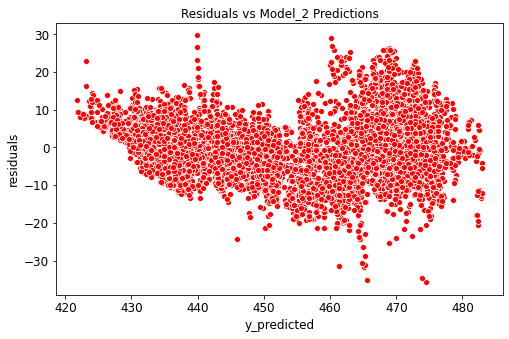

In [ ]:
plt.rcParams.update({'font.size': 12,'figure.figsize':(8,5)}) # set plot parameters
# plot a scatterplot of the residulas vs y_predicted
sns.scatterplot(x='y_predicted', y='residuals', data=resid_predicted_data, color="red")
plt.title("Residuals vs Model_2 Predictions",fontsize=12)
plt.show() # show plot

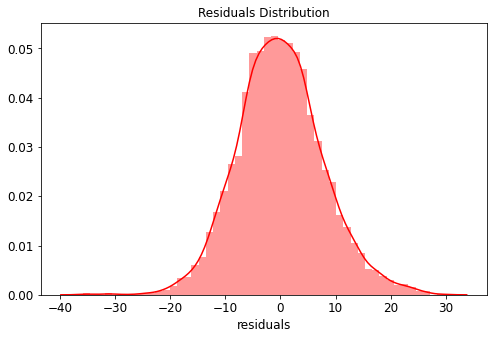

In [ ]:
plt.rcParams.update({'font.size': 12,'figure.figsize':(8,5)}) # set plot parameters
# plot a histogram of the residuals 
sns.distplot(resid_predicted_data["residuals"], color="red")
plt.title("Residuals Distribution",fontsize=12)
plt.show() #show plot

The scatterplot and histogram above show:
- Nearly normal distribution of residuals
- There is no constant variability of residuals

Therfore, it seems like model_2 is not a valid model. 

**Assessing Model_2**   
I'll use the 30% test data set aside at the begining to assess the model. 

In [ ]:
# generate predictions on test data
y_predicted_test = model_2.predict(X_test[['Exhaust_vacuum','Ambient_pressure']])

# generate and print the RMSE
print(np.sqrt(metrics.mean_squared_error(y_test.T.squeeze(), y_predicted_test)))

8.012033217528069


### Section III: Conclusions
A summary of the findings from constructing and evaluating the two models above:
- The average accuracy scores derived via the K-fold process is highere in Model_1 - 89.98% (78.75% in Model_2)
- R_squared is higher in Model_1 - 0.900 (0.788 in Model_2)
- RMSE is lower in Model_1 - 5.4 (8 in Model_2)
- There is no constant variability of residuals in Model_2, which invalidates it.  

My conclusion is that my preferred model is Model_1, which uses 'Temperature' and 'Ambient_pressure' as predictors of 'Net_hourly_electrical_energy_output'.

Presentation Link:
https://screencast-o-matic.com/watch/cY1VeMpBhd